2 hyperparameter DL
- learning rate
- epoch/ jmlh iterasi -> diulang2 trs sampe nilai bobot ga brbh lgi

In [ ]:
# You can run online via https://repl.it/languages/python3
from random import choice
from numpy import array, dot, random

unit_step = lambda x: 0 if x < 0 else 1 # fungsi aktivasi unit step (threshold function) -> outputnya binary

# Fourth data is bias constan -> bias itu input yg konstan
training_data = [
    (array([1,2,1,1]), 1),
    (array([3,1,1,1]), 0) ]

#w = random.rand(4) -> bobot awal random
w = array([1. , -1.,  2.,  -2.]) # biar sama kaya ppt
errors = []

# 2 ini hyper parameters
eta = 0.2   # Learning rate
n = 100    # number of iteration
# klo cmn 1 iteration ya gbs converged

for i in range(n):
	# Online Learning 
    x, expected = choice(training_data) # pilih 1 data acak
    result = dot(w, x) # linear combination
    error = expected - unit_step(result)
    errors.append(error)
    # Perceptron Learning Rule
    w += eta * error * x # perbaharui bobot pake error (klo error 0, bobot gberubah krn * 0 tetep 0)

# Testing
for x, _ in training_data:
    result = dot(x, w)
    print("{}: {} -> {}".format(x[:3], result, unit_step(result)))

[1 2 1]: 0.40000000000000013 -> 1
[3 1 1]: -0.600000000000001 -> 0


Online Learning (also known as Incremental Learning) is a machine learning paradigm where the model updates its parameters continuously as new data arrives, rather than being trained on a fixed dataset all at once.

The training loop selects one random sample per iteration, this is stochastic gradient descent (SGD) rather than batch gradient descent, where the model would update after processing the entire dataset

In [2]:
eta = 0.5   # Learning rate
n = 60    # number of iteration
# klo cmn 1 iteration ya gbs converged

for i in range(n):
	# Online Learning 
    x, expected = choice(training_data) # In each iteration, only one training sample is chosen
    result = dot(w, x)
    error = expected - unit_step(result)
    errors.append(error)
    w += eta * error * x # perbaharui bobot pake error

# Testing
for x, _ in training_data:
    result = dot(x, w)
    print("{}: {} -> {}".format(x[:3], result, unit_step(result)))

[1 2 1]: 0.40000000000000013 -> 1
[3 1 1]: -0.600000000000001 -> 0


In [3]:
?choice

Signature: choice(seq)
Docstring: Choose a random element from a non-empty sequence.
File:      c:\users\user\.conda\envs\deep_learning\lib\random.py
Type:      method

In [4]:
choice(training_data)

(array([3, 1, 1, 1]), 0)

Output yg bener (yg converged) itu antara -1 sampe 1

Klo misal 1,1 diualng2 dikali2 trs makin besar kasilnya nnti bakal jdi divergen

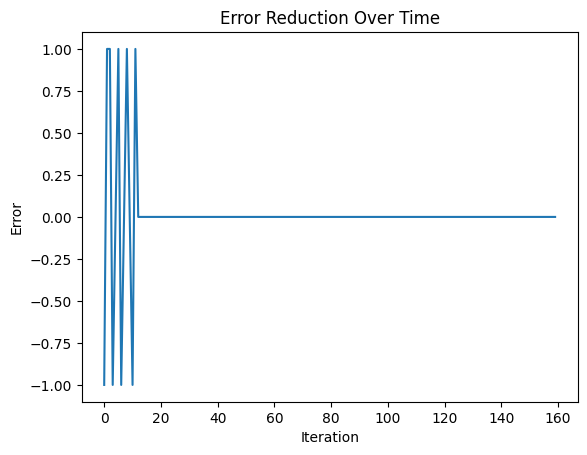

In [5]:
import matplotlib.pyplot as plt

plt.plot(errors)
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.title("Error Reduction Over Time")
plt.show()